In [ ]:
#Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Upload file
uploaded_file = files.upload()
for fn in uploaded_file.keys():
  print('You uploaded file:', fn)

#Load the dataset
file_name = ("Biomass Gasification Dataset.xlsx")
df = pd.read_excel(file_name)

#Display the first few rows
print(df.head())


Saving Biomass Gasification Dataset.xlsx to Biomass Gasification Dataset (2).xlsx
You uploaded file: Biomass Gasification Dataset (2).xlsx
          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

 

In [ ]:
#Print the dataset's columns
print(df.columns)

column_dtypes = df.dtypes

# Print the results
print(column_dtypes)

Index(['feed', 'Type of Feed', 'C', 'H', 'N', 'S', 'O', 'ASH',
       'C-H Aromatics ', 'C-H  Alkanes', 'C-O ', 'C=C ', 'C=O ', 'O-H ',
       'Temp', 'Time', 'BC', 'Reactor', 'Catalyst Type',
       'Catalyst Concentration', 'CO2 mole fraction', 'H2 mole fraction',
       'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction'],
      dtype='object')
feed                       object
Type of Feed               object
C                         float64
H                         float64
N                         float64
S                         float64
O                         float64
ASH                       float64
C-H Aromatics               int64
C-H  Alkanes                int64
C-O                         int64
C=C                         int64
C=O                         int64
O-H                         int64
Temp                        int64
Time                        int64
BC                        float64
Reactor                    object
Catalyst Type             

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)


feed                      0
Type of Feed              0
C                         0
H                         0
N                         0
S                         0
O                         0
ASH                       0
C-H Aromatics             0
C-H  Alkanes              0
C-O                       0
C=C                       0
C=O                       0
O-H                       0
Temp                      0
Time                      0
BC                        0
Reactor                   0
Catalyst Type             0
Catalyst Concentration    0
CO2 mole fraction         0
H2 mole fraction          0
Hydrogen selectivity      0
CO mole fraction          0
CH4 mole fraction         0
dtype: int64


In [ ]:
#Check for irregularities in dataset

# 1. Outlier Detection
# Calculate Z-scores
numeric_cols = df.select_dtypes(include=['int64', 'float64'])  # Specify numeric data type codes
z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()  # Calculate Z-scores for selected columns
# Identify outliers based on a threshold (e.g., Z-score > 3 or < -3)
outliers = df[(z_scores > 3) | (z_scores < -3)]

# 2. Missing Values
# Check for missing values
missing_values = df.isnull().sum()

# 3. Duplicate Values
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]


In [ ]:
# Get unique feed types
unique_feed_types = df['Type of Feed'].unique()

# Print the unique feed types
print("Unique feed types:", unique_feed_types)

Unique feed types: ['Orange Peel' 'Banana Peel' 'Watermelon Peel' 'PET' 'wheat straw'
 'Crude Glycerol' 'Dunalila salina- CGLY 4%' 'Esperolina Plantis- CGLY 4%'
 'Chulorala Valgaris- CGLY 4%' 'Dunalila salina- Dionized Water'
 'Esperolina Plantis- Dionized Water' 'Chulorala Valgaris-Dionized Water'
 'Wood' 'Black Liquor' 'Black Liquor- Wood 3%' 'Black Liqour- Wood 5%'
 'Black Liquor- Wood 7%' 'Black Liquor- Wood 3%- Formic Acid'
 'Black Liquor- Wood 5%- Formic Acid' 'Black Liquor- Wood 7%- Formic Acid'
 'Distillition Waste water' 'Dairy Waste water based on Cheese'
 'Dairy Waste water based on Milk' 'Food Waste(Kitchen)']


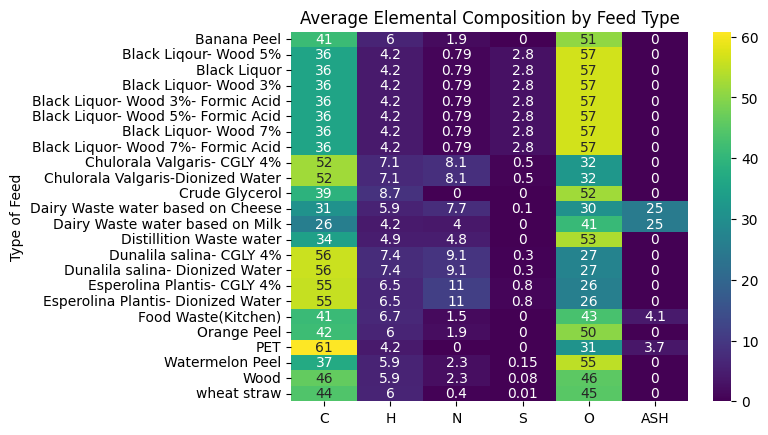

In [ ]:
# Group the data by 'Type of Feed' and calculate the mean of each element
grouped_data = df.groupby('Type of Feed')[['C', 'H', 'N', 'S', 'O', 'ASH']].mean()

# Create a heatmap to visualize the differences
sns.heatmap(grouped_data, annot=True, cmap="viridis")
plt.title("Average Elemental Composition by Feed Type")
plt.show()

In [ ]:
# Group the data by 'Type of Feed' and calculate min, max, and avg of 'Temp'
grouped_data = df.groupby('Type of Feed')['Temp'].agg(['min', 'max', 'mean'])

# Print the results
print(grouped_data)

                                    min  max        mean
Type of Feed                                            
Banana Peel                         400  400  400.000000
Black Liqour- Wood 5%               400  400  400.000000
Black Liquor                        350  400  386.764706
Black Liquor- Wood 3%               400  400  400.000000
Black Liquor- Wood 3%- Formic Acid  400  400  400.000000
Black Liquor- Wood 5%- Formic Acid  400  400  400.000000
Black Liquor- Wood 7%               400  400  400.000000
Black Liquor- Wood 7%- Formic Acid  400  400  400.000000
Chulorala Valgaris- CGLY 4%         400  400  400.000000
Chulorala Valgaris-Dionized Water   400  400  400.000000
Crude Glycerol                      350  400  385.227273
Dairy Waste water based on Cheese   350  400  386.538462
Dairy Waste water based on Milk     350  400  383.333333
Distillition Waste water            300  400  343.055556
Dunalila salina- CGLY 4%            400  400  400.000000
Dunalila salina- Dionized Water

In [ ]:
# Calculate min, max, and avg temperature for the whole dataset
overall_stats = df['Temp'].agg(['min', 'max', 'mean'])

# Print the results
print("Overall temperature statistics:")
print(overall_stats)

Overall temperature statistics:
min      80.000000
max     400.000000
mean    369.364754
Name: Temp, dtype: float64


In [ ]:
# Delete the column named 'Reactor' since every one is batch
df = df.drop('Reactor', axis=1)

# Print the modified DataFrame
print(df)

            feed         Type of Feed      C     H     N    S      O  ASH  \
0    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
..           ...                  ...    ...   ...   ...  ...    ...  ...   
239        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
240        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
241        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
242        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
243        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   

     C-H Aromatics   C-H  Alkanes  ...  Temp  Time    BC  Catalyst Type  \


In [ ]:
# Create new columns for the ratios
df['carbon-to-hydrogen'] = df['C'] / df['H']
df['oxygen-to-hydrogen'] = df['O'] / df['H']

# Print the modified DataFrame
print(df)

            feed         Type of Feed      C     H     N    S      O  ASH  \
0    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
..           ...                  ...    ...   ...   ...  ...    ...  ...   
239        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
240        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
241        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
242        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
243        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   

     C-H Aromatics   C-H  Alkanes  ...    BC  Catalyst Type  \
0           

In [ ]:
# Group the data by 'Type of Feed' and calculate min, max, and mean for the ratio columns
grouped_data_ratios = df.groupby('Type of Feed')[['carbon-to-hydrogen', 'oxygen-to-hydrogen']].agg(['min', 'max', 'mean'])

# Print the results
print(grouped_data_ratios)

                                   carbon-to-hydrogen                        \
                                                  min        max       mean   
Type of Feed                                                                  
Banana Peel                                  6.901503   6.901503   6.901503   
Black Liqour- Wood 5%                        8.451306   8.451306   8.451306   
Black Liquor                                 8.451306   8.451306   8.451306   
Black Liquor- Wood 3%                        8.451306   8.451306   8.451306   
Black Liquor- Wood 3%- Formic Acid           8.451306   8.451306   8.451306   
Black Liquor- Wood 5%- Formic Acid           8.451306   8.451306   8.451306   
Black Liquor- Wood 7%                        8.451306   8.451306   8.451306   
Black Liquor- Wood 7%- Formic Acid           8.451306   8.451306   8.451306   
Chulorala Valgaris- CGLY 4%                  7.352113   7.352113   7.352113   
Chulorala Valgaris-Dionized Water            7.35211

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(sparse=False)

# Fit the encoder to the 'Type of Feed' column
encoder.fit(df[['Type of Feed']])

# Transform the column
encoded_data = encoder.transform(df[['Type of Feed']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())


# Concatenate the encoded columns with the original DataFrame (if needed)
df_with_encoded = pd.concat([df, encoded_df], axis=1)

# Print the modified DataFrame
print(df_with_encoded)

            feed         Type of Feed      C     H     N    S      O  ASH  \
0    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
..           ...                  ...    ...   ...   ...  ...    ...  ...   
239        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
240        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
241        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
242        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
243        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   

     C-H Aromatics   C-H  Alkanes  ...  Type of Feed_Dunalila salina- CGLY 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Calculate Z-scores for the specified columns
z_scores = (df[['CO2 mole fraction', 'H2 mole fraction', 'CO mole fraction']] - df[['CO2 mole fraction', 'H2 mole fraction', 'CO mole fraction']].mean()) / df[['CO2 mole fraction', 'H2 mole fraction', 'CO mole fraction']].std()

# Identify outliers based on a threshold (e.g., Z-score > 3 or < -3)
outliers = df[(z_scores > 3) | (z_scores < -3)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
    feed Type of Feed   C   H   N   S   O  ASH  C-H Aromatics   C-H  Alkanes  \
0    NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
1    NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
2    NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
3    NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
4    NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
..   ...          ...  ..  ..  ..  ..  ..  ...             ...           ...   
239  NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
240  NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
241  NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
242  NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   
243  NaN          NaN NaN NaN NaN NaN NaN  NaN             NaN           NaN   

     ...  BC  Catalyst Type  

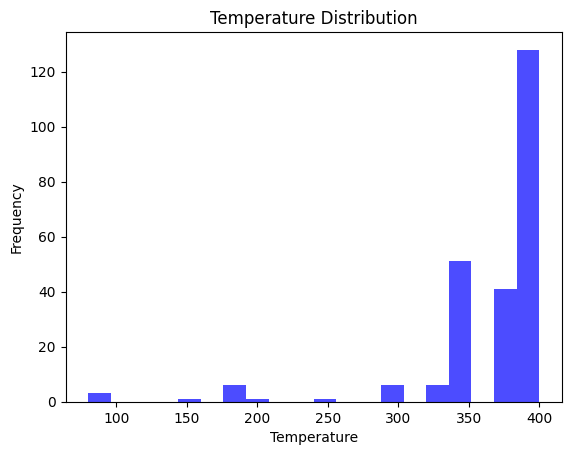

In [ ]:
# Plot the histogram
plt.hist(df['Temp'], bins=20, color='blue', alpha=0.7)

# Add labels and title
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Show the plot
plt.show()

Most temperatures are in the higher end of the range

Correlation between temperature and CO2 mole fraction: -0.3139426047465725


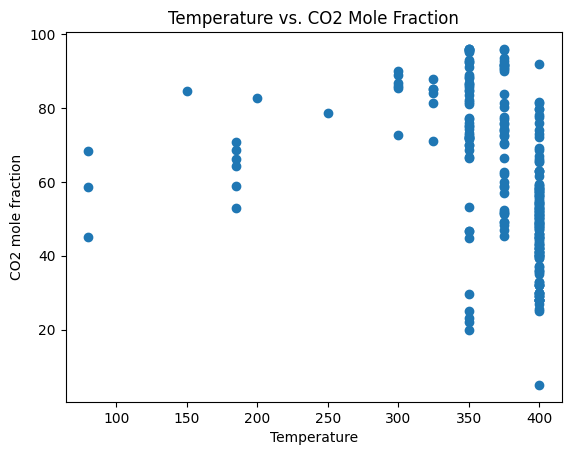

In [ ]:
# Calculate the correlation coefficient
correlation = df['Temp'].corr(df['CO2 mole fraction'])

# Print the correlation coefficient
print("Correlation between temperature and CO2 mole fraction:", correlation)

# Visualize the relationship using a scatter plot
plt.scatter(df['Temp'], df['CO2 mole fraction'])
plt.xlabel("Temperature")
plt.ylabel("CO2 mole fraction")
plt.title("Temperature vs. CO2 Mole Fraction")
plt.show()

CO2 mole fraction ranges seem to broaden at higher temperatures

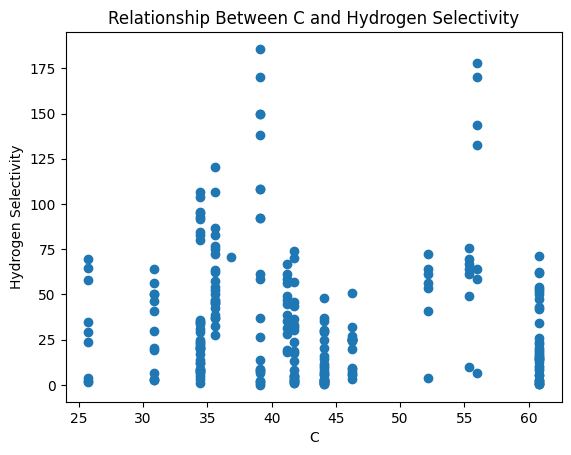

In [ ]:
# Create a scatter plot
plt.scatter(df['C'], df['Hydrogen selectivity'])

# Add labels and title
plt.xlabel("C")
plt.ylabel("Hydrogen Selectivity")
plt.title("Relationship Between C and Hydrogen Selectivity")

# Show the plot
plt.show()

No trends between C and hydrogen selectivity are apparent

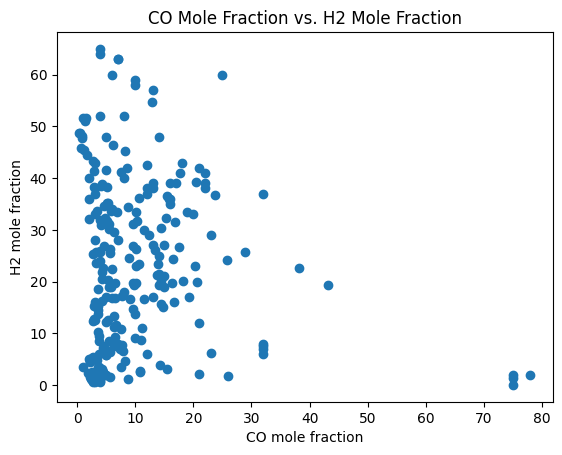

In [ ]:
# Create a scatter plot
plt.scatter(df['CO mole fraction'], df['H2 mole fraction'])

# Add labels and title
plt.xlabel("CO mole fraction")
plt.ylabel("H2 mole fraction")
plt.title("CO Mole Fraction vs. H2 Mole Fraction")

# Show the plot
plt.show()

CO levels don't seem to have much of a correlation with H2 levels

In [ ]:
# Specify the columns for features and target variables
feature_cols = ['C', 'H', 'N', 'S', 'O', 'ASH', 'Temp', 'Type of Feed']
target_cols = ['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction']

# Split the DataFrame into features and target variables
X = df[feature_cols]
y = df[target_cols]

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (244, 8)
y shape: (244, 5)
